,name,tipo,ticket,codISIN,Valor,qtde,fator,total
0,B3,ON NM,B3SA3,BRB3SAACNOR6,16.99,59.0,1.0,1002.41
5,BRASIL,ON NM,BBAS3,BRBBASACNOR3,32.65,30.0,1.0,979.50
7,COSAN,ON NM,CSAN3,BRCSANACNOR6,24.25,80.0,1.0,1940.00
9,EZTEC,ON NM,EZTC3,BREZTCACNOR0,31.25,31.0,1.0,968.75
10,FLEURY,ON NM,FLRY3,BRFLRYACNOR5,26.55,38.0,1.0,1008.90
11,MOVIDA,ON NM,MOVI3,BRMOVIACNOR0,19.80,52.0,1.0,1029.60
12,3R PETROLEUM,ON NM,RRRP3,BRRRRPACNOR5,46.33,43.0,1.0,1992.19
13,SUZANO S.A.,ON NM,SUZB3,BRSUZBACNOR0,59.60,17.0,1.0,1013.20


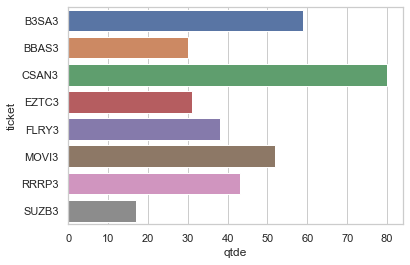

In [43]:
from profit import Wallet
import seaborn as sns
carteira = Wallet.stocks()

sns.set_theme(style="whitegrid")


sns.barplot(data=carteira, y="ticket", x='qtde')
carteira